In [4]:
df = pd.read_csv('../dataset/Psittaciformes.csv',
                 on_bad_lines='skip',
                 encoding='utf-8',
                 dtype=str,  # Read all as string first
                 skip_blank_lines=True,
                 header=0,
                 skipinitialspace=True)

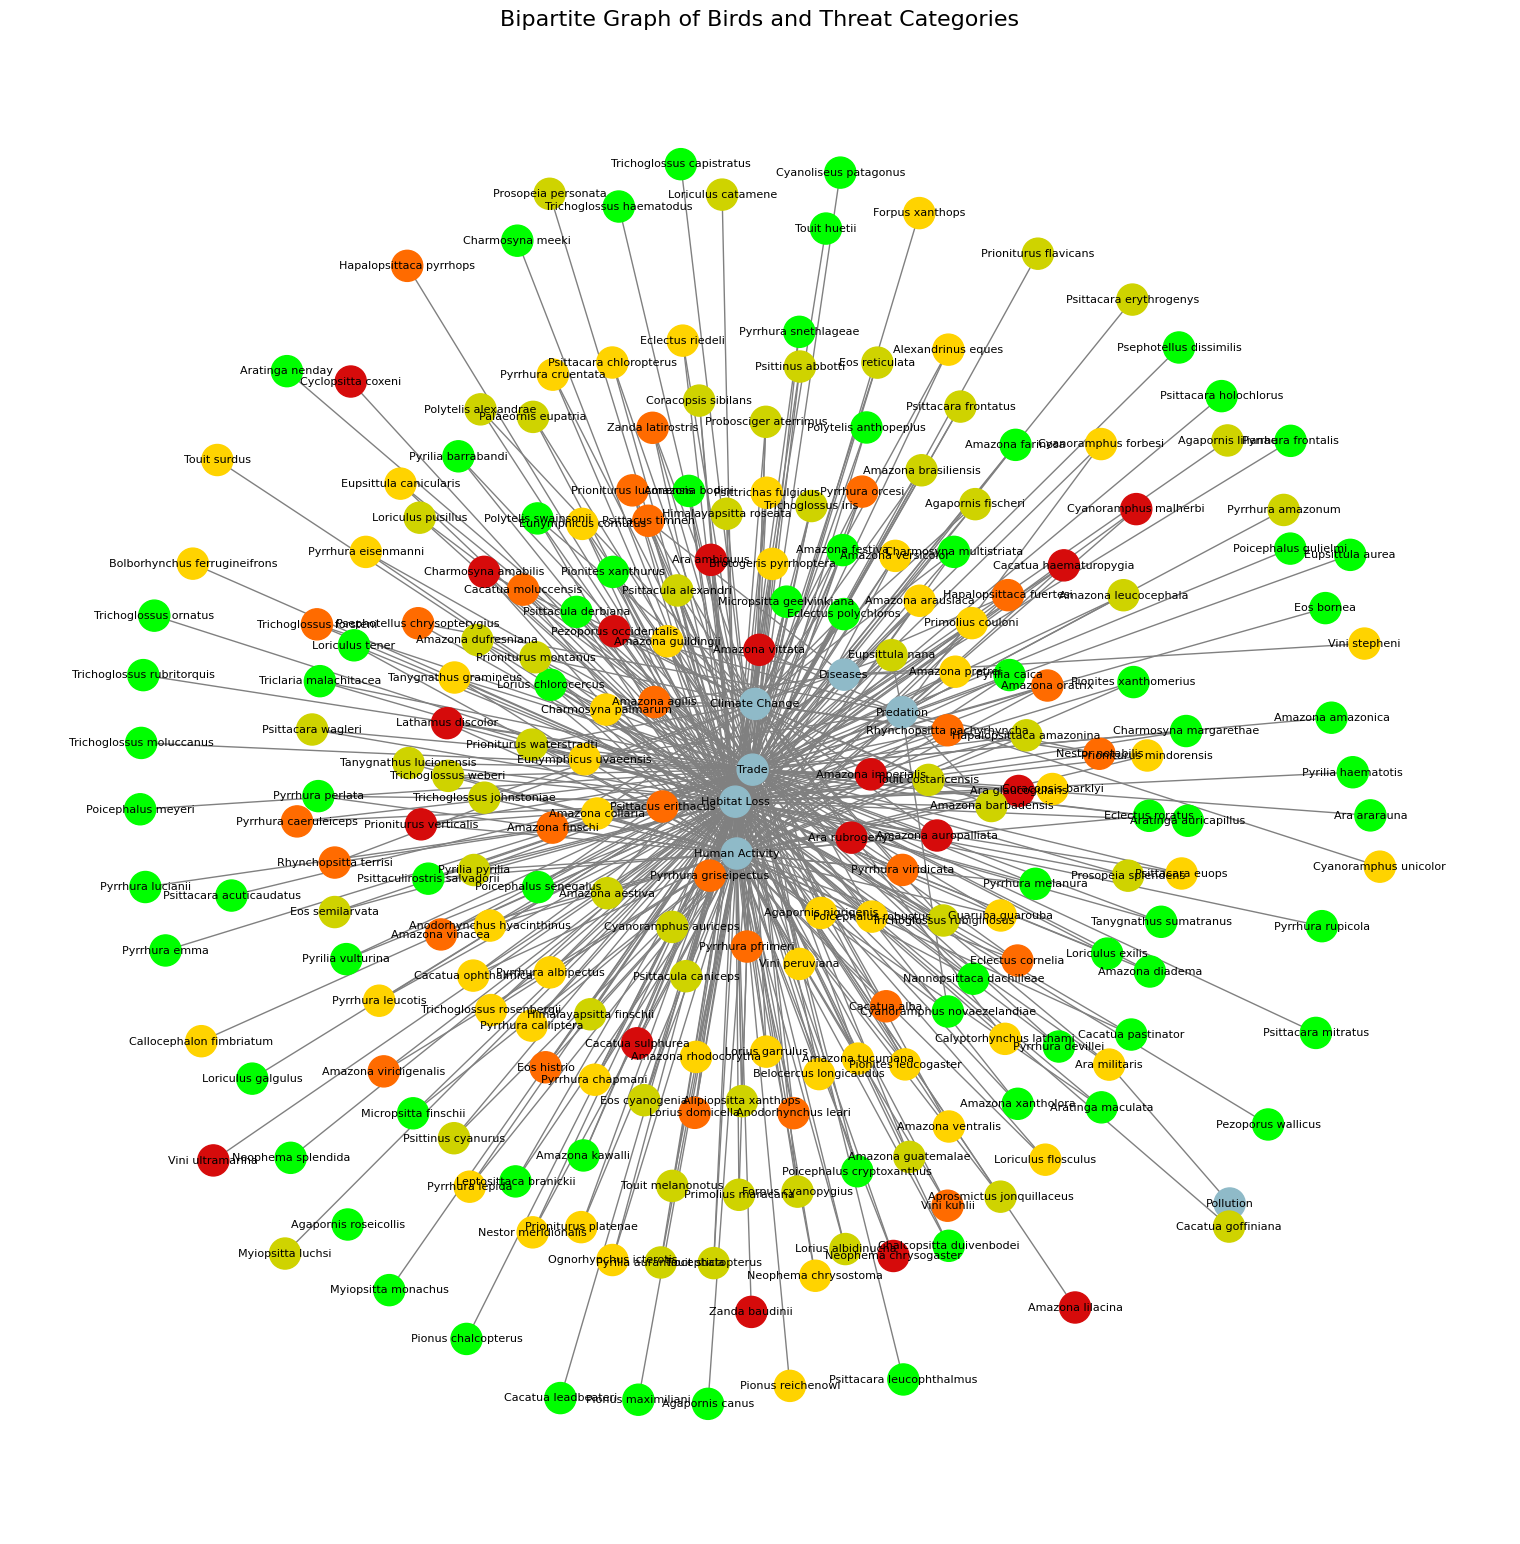

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

# Define the categorize_threat function
def categorize_threat(threat, category_keywords):
    return any(keyword in threat.lower() for keyword in category_keywords)

# Categories and their keywords
categories = {
    'Trade': ['trade'],
    'Habitat Loss': ['habitat', 'loss', 'forest', 'areas'],
    'Climate Change': ['cyclones', 'natural', 'climate'],
    'Diseases': ['avian', 'malaria'],
    'Predation': ['predators'],
    'Human Activity': ['hunting', 'logging', 'agriculture'],
    'Pollution': ['pollution'],
}

# Replace with the location of your shapefile
world_shapefile_path = "./ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"

# Load the world shapefile
world = gpd.read_file(world_shapefile_path)

# Sample dataframe (replace with your data)
# df = pd.read_csv('your_data.csv')

# Filter relevant columns for the map
columns_needed = ['scientificName', 'Centroid.Latitude', 'Centroid.Longitude', 'redlistCategory', 'threats']
map_data = df[columns_needed].dropna()

# Define colors for extinction status
colors = {
    'Least Concern': '#00FF00',        
    'Vulnerable': '#FFD300',          
    'Near Threatened': '#CFD300',
    'Endangered': '#FF6B00',          
    'Critically Endangered': '#D60B0B',
    'Extinct in the Wild': '#2D1F15',  
    'Extinct': '#000000',              
}

# Assign colors based on 'redlistCategory'
map_data['color'] = map_data['redlistCategory'].map(colors)

# Build a bipartite graph
B = nx.Graph()

# Add category nodes
for category in categories:
    B.add_node(category, bipartite=1, color='#8FBAC8')  # Threat category nodes

# Add bird nodes and edges
for _, row in map_data.iterrows():
    species = row['scientificName']
    threats = row['threats'].split(',')  # Assuming threats are comma-separated
    species_color = row['color']

    B.add_node(species, bipartite=0, color=species_color)  # Add bird node

    for category, keywords in categories.items():
        if any(categorize_threat(threat, keywords) for threat in threats):
            B.add_edge(species, category)  # Add edge if the threat matches the category

# Plot the bipartite graph
pos = nx.spring_layout(B, k=0.5, seed=42)
plt.figure(figsize=(15, 15))

# Extract node colors
node_colors = [data['color'] for _, data in B.nodes(data=True)]

nx.draw(
    B, pos,
    with_labels=True,
    node_color=node_colors,
    node_size=500,
    edge_color='grey',
    font_size=8
)
plt.title("Bipartite Graph of Birds and Threat Categories", fontsize=16)
plt.show()

Top 5 nodes by degree centrality:
Habitat Loss: 0.8398268398268398
Trade: 0.6666666666666666
Human Activity: 0.4805194805194805
Climate Change: 0.19913419913419914
Predation: 0.06060606060606061

Top 5 nodes by betweenness centrality:
Habitat Loss: 0.5541003419118532
Trade: 0.36099180862907393
Human Activity: 0.11306300818243849
Climate Change: 0.01847986945587719
Predation: 0.010293345120003355

Detected communities:
Community 1: ['Agapornis canus', 'Agapornis lilianae', 'Amazona amazonica', 'Amazona diadema', 'Amazona farinosa', 'Amazona guatemalae', 'Amazona kawalli', 'Amazona leucocephala', 'Amazona ventralis', 'Amazona xantholora', 'Ara ararauna', 'Aratinga auricapillus', 'Aratinga nenday', 'Charmosyna margarethae', 'Cyanoliseus patagonus', 'Eclectus riedeli', 'Eos bornea', 'Eos reticulata', 'Eos semilarvata', 'Eupsittula aurea', 'Eupsittula canicularis', 'Forpus cyanopygius', 'Forpus xanthops', 'Loriculus exilis', 'Loriculus galgulus', 'Loriculus pusillus', 'Lorius garrulus', 'My

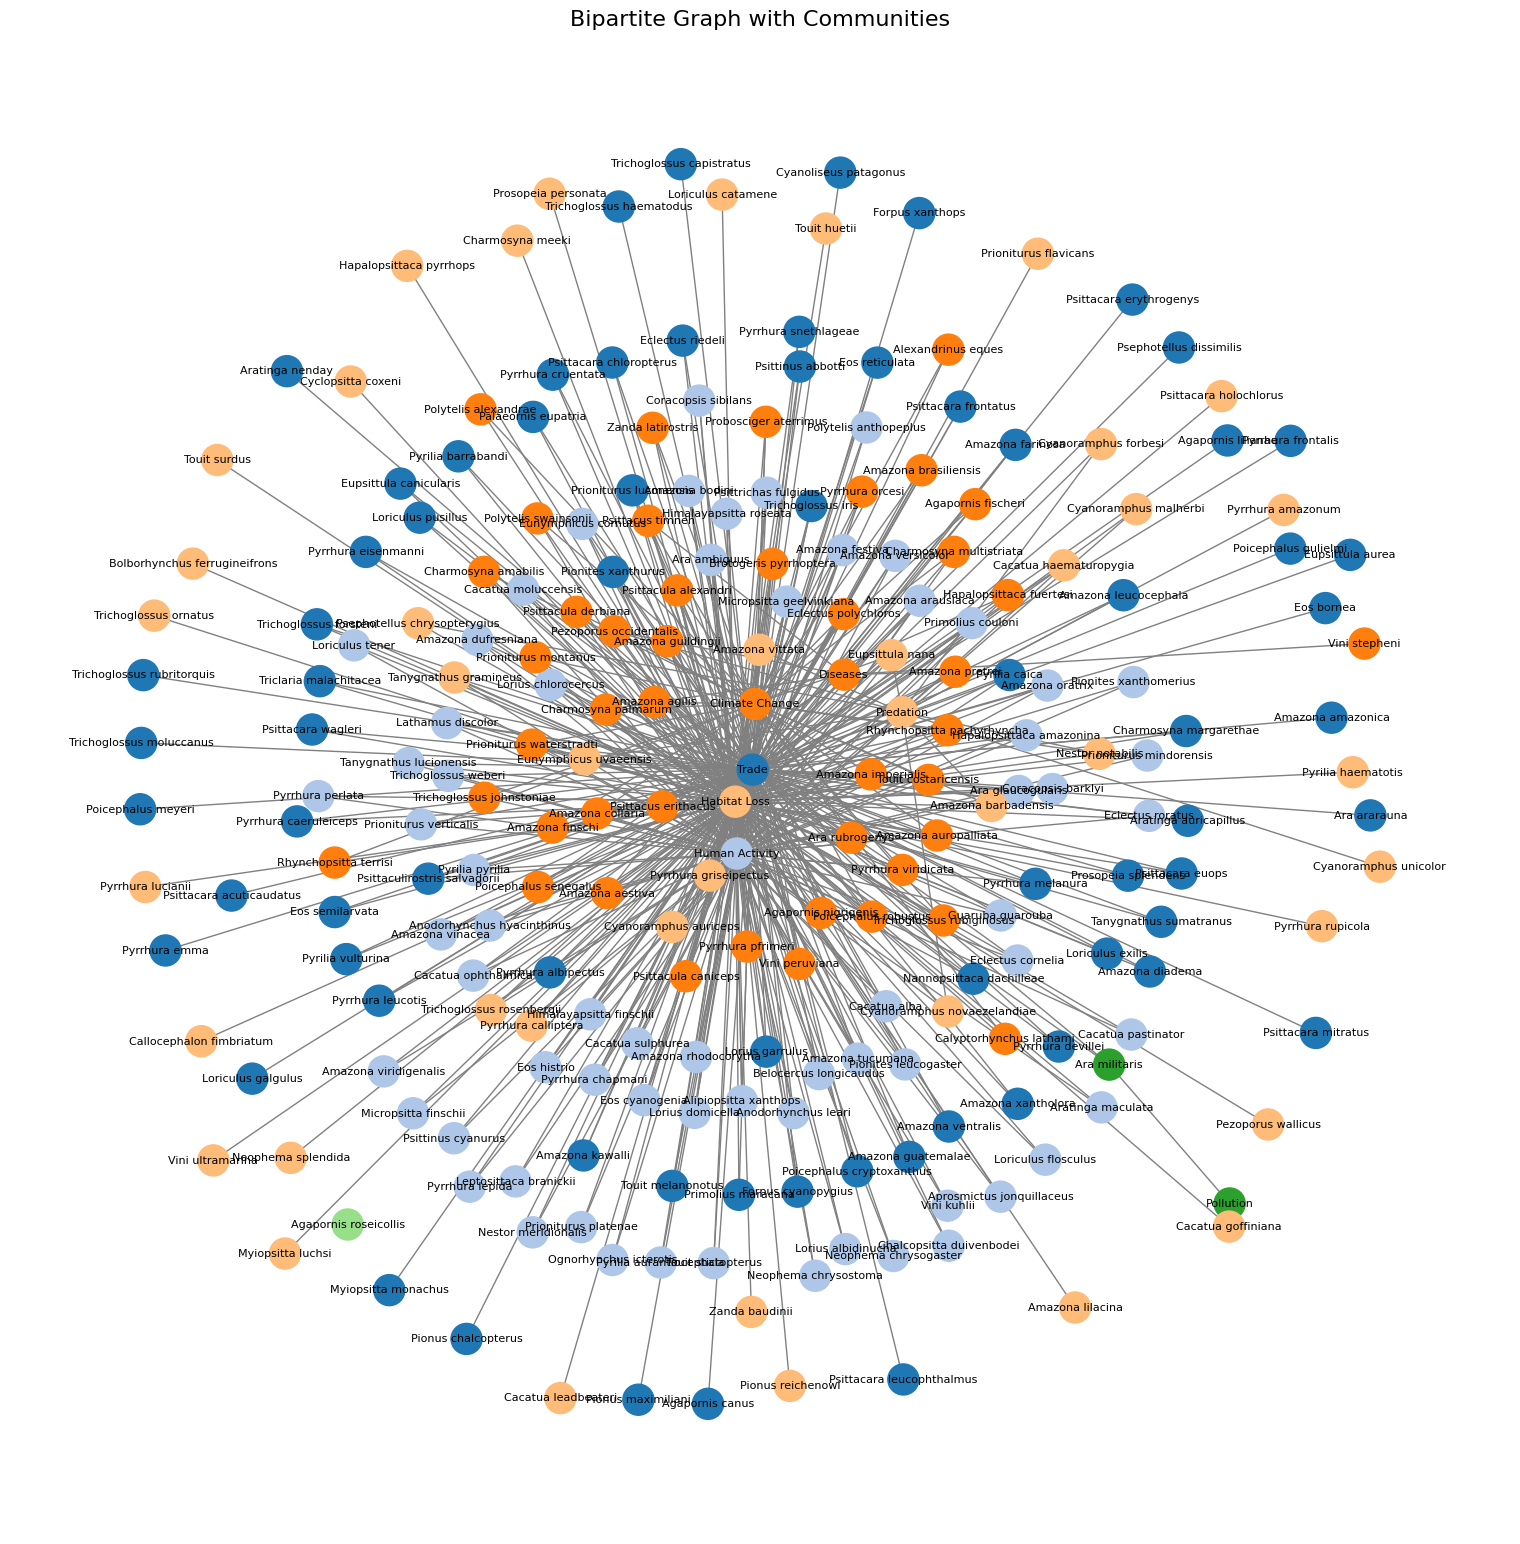

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from networkx.algorithms import community

# Define the categorize_threat function
def categorize_threat(threat, category_keywords):
    return any(keyword in threat.lower() for keyword in category_keywords)

# Categories and their keywords
categories = {
    'Trade': ['trade'],
    'Habitat Loss': ['habitat', 'loss', 'forest', 'areas'],
    'Climate Change': ['cyclones', 'natural', 'climate'],
    'Diseases': ['avian', 'malaria'],
    'Predation': ['predators'],
    'Human Activity': ['hunting', 'logging', 'agriculture'],
    'Pollution': ['pollution'],
}

# Replace with the location of your shapefile
world_shapefile_path = "./ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"

# Load the world shapefile
world = gpd.read_file(world_shapefile_path)

# Sample dataframe (replace with your data)
# df = pd.read_csv('your_data.csv')

# Filter relevant columns for the map
columns_needed = ['scientificName', 'Centroid.Latitude', 'Centroid.Longitude', 'redlistCategory', 'threats']
map_data = df[columns_needed].dropna()

# Define colors for extinction status
colors = {
    'Least Concern': '#00FF00',        
    'Vulnerable': '#FFD300',          
    'Near Threatened': '#CFD300',
    'Endangered': '#FF6B00',          
    'Critically Endangered': '#D60B0B',
    'Extinct in the Wild': '#2D1F15',  
    'Extinct': '#000000',              
}

# Assign colors based on 'redlistCategory'
map_data['color'] = map_data['redlistCategory'].map(colors)

# Build a bipartite graph
B = nx.Graph()

# Add category nodes
for category in categories:
    B.add_node(category, bipartite=1, color='#8FBAC8')  # Threat category nodes

# Add bird nodes and edges
for _, row in map_data.iterrows():
    species = row['scientificName']
    threats = row['threats'].split(',')  # Assuming threats are comma-separated
    species_color = row['color']

    B.add_node(species, bipartite=0, color=species_color)  # Add bird node

    for category, keywords in categories.items():
        if any(categorize_threat(threat, keywords) for threat in threats):
            B.add_edge(species, category)  # Add edge if the threat matches the category

# Calculate centrality measures
degree_centrality = nx.degree_centrality(B)
betweenness_centrality = nx.betweenness_centrality(B)

# Print top influential nodes by degree centrality
print("Top 5 nodes by degree centrality:")
for node, centrality in sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)[:5]:
    print(f"{node}: {centrality}")

# Print top influential nodes by betweenness centrality
print("\nTop 5 nodes by betweenness centrality:")
for node, centrality in sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)[:5]:
    print(f"{node}: {centrality}")

# Detect communities using the Louvain method or greedy modularity (as an example, greedy modularity here)
communities = community.greedy_modularity_communities(B)

# Print communities
print("\nDetected communities:")
for i, comm in enumerate(communities):
    print(f"Community {i+1}: {sorted(comm)}")

# Assign colors to communities for visualization
community_colors = plt.cm.tab20(range(len(communities)))
community_mapping = {node: i for i, comm in enumerate(communities) for node in comm}
node_colors = [community_colors[community_mapping[node]] if node in community_mapping else '#CCCCCC' for node in B.nodes]

# Plot the bipartite graph with communities
pos = nx.spring_layout(B, k=0.5, seed=42)
plt.figure(figsize=(15, 15))
nx.draw(
    B, pos,
    with_labels=True,
    node_color=node_colors,
    node_size=500,
    edge_color='grey',
    font_size=8
)
plt.title("Bipartite Graph with Communities", fontsize=16)
plt.show()

Centrality Measures:
degree_centrality to identify nodes with the most direct connections.
betweenness_centrality to identify nodes that serve as bridges in the network.
Community Detection:
Communities are identified using the greedy modularity algorithm, which clusters nodes based on their connections.
Detected communities are printed and visually differentiated using unique colors in the graph visualization.